# Anomaly Detection

This notebook analyzes a dataset on global electricity usage.


## Import libraries

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [50]:
data_path = 'train.txt'

data = pd.read_csv(data_path)

print(data.shape)

(1556444, 9)


### Observe the imperfections in the data

In [46]:
data.isnull().sum()

Date                        0
Time                        0
Global_active_power        24
Global_reactive_power    8348
Voltage                  8348
Global_intensity         8348
Sub_metering_1           8348
Sub_metering_2           8348
Sub_metering_3           8348
dtype: int64

### Cleaning the data

The function above shows that there are 8348 null values in multiple columns, and 24 null values in Global_active_power.

We will need to remove those to clean the dataset.

The pandas dropna() function removes all rows that have any null values. 

The sum of null values afterwards should be 0.

In [47]:
data = data.dropna();
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

## Understanding the data

The data is split into 9 columns;

* **Date**: The date of the data collection. 
* **Time**: The time of the data collection. Data was recorded once every minute.
* **Global_active_power**: 
* **Voltage**:
* **Global_intensity**:
* **Sub_metering_1**:
* **Sub_metering_2**:
* **Sub_metering_3**:

In [48]:
data.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
10,16/12/2006,17:34:00,4.448,0.498,232.86,19.6,0.0,1.0,17.0
15,16/12/2006,17:39:00,3.384,0.282,237.14,14.2,0.0,0.0,17.0
18,16/12/2006,17:42:00,3.266,0.000,237.13,13.8,0.0,0.0,18.0
20,16/12/2006,17:44:00,5.894,0.000,232.69,25.4,0.0,0.0,16.0


## A quick look at the first 10 days

Global Active Power vs Time for the first 30 days (30 days * 24 hours * 60 minutes)

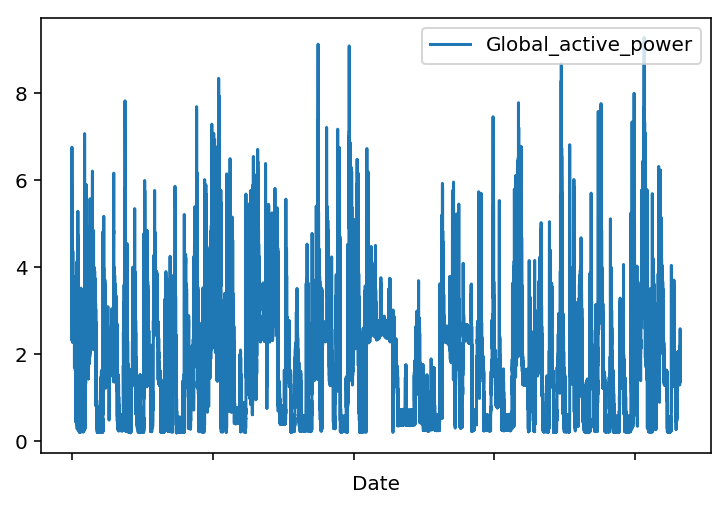

In [49]:
data[:30*24*60].plot(x='Date', y='Global_active_power')

In [13]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1.556420e+06,1.548096e+06,1.548096e+06,1.548096e+06,1.548096e+06,1.548096e+06,1.548096e+06
mean,1.227081e+00,1.218398e-01,2.405477e+02,4.642235e+00,1.156032e+00,1.358988e+00,6.166653e+00
std,1.055740e+00,1.116522e-01,3.261095e+00,4.579198e+00,6.275350e+00,6.023466e+00,8.315138e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.541500e-01,4.600000e-02,2.386700e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.200000e-01,1.000000e-01,2.407800e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.696200e+00,1.920000e-01,2.426700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.539400e+02,4.840000e+01,8.200000e+01,7.800000e+01,3.100000e+01
